In [94]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
survey = pd.read_csv('/content/gdrive/My Drive/survey.csv - Sheet1.csv')

In [97]:
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [98]:
survey.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,No,No,Yes,Yes,No,No,Yes,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [99]:
survey.shape

(1259, 27)

In [100]:
survey.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [101]:
# drop the comments column(87% missing values) and state(40% missing-use country instead)
survey.drop(columns=['state','comments'],inplace=True)

In [102]:
print(survey['self_employed'].value_counts())
print(survey['work_interfere'].value_counts())

No     1095
Yes     146
Name: self_employed, dtype: int64
Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64


In [103]:
# impute missing values by mode
survey['self_employed'].fillna('No',inplace=True)
survey['work_interfere'].fillna('Sometimes',inplace=True)

In [104]:
survey.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


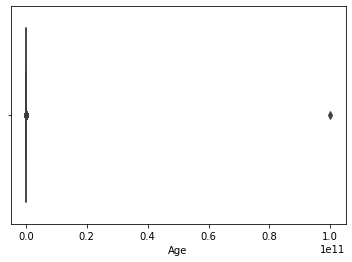

In [105]:
#age column Boxplot
sns.boxplot(survey['Age'])

From the plot above, 'Age' column has outliers

In [106]:
#removing outliers
survey.drop(survey[survey['Age'] < 0 ].index, inplace = True) 
survey.drop(survey[survey['Age'] > 100].index, inplace = True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


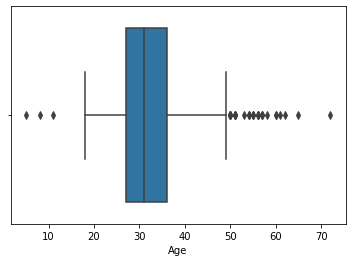

In [107]:
sns.boxplot(survey['Age'])

In [111]:
survey['mental_health_consequence'].value_counts()

No       489
Maybe    476
Yes      289
Name: mental_health_consequence, dtype: int64

In [112]:
survey['treatment'].value_counts()

Yes    633
No     621
Name: treatment, dtype: int64

**Data cleaning/Transformation**

In [113]:
survey['Gender'].value_counts()

Male                                              613
male                                              205
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
msle                                                1
woman                                               1
femail                                              1
Malr                        

In [114]:

all_female = ['female', 'Cis Female', 'f', 'F', 'Woman','woman', 'Femake', 'Trans woman', 'Female', 'Female (trans)'
              , 'cis-female/femme', 'Female (cis)', 'femail', 'queer/she/they', 'Trans-female']
for i in survey.index:
    if survey.Gender[i] in all_female:
        survey.at[i, 'Gender']='F'
    else:
        survey.at[i, 'Gender']='M'

In [115]:
survey['Gender'].value_counts()

M    1004
F     250
Name: Gender, dtype: int64

In [116]:
survey.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,F,United States,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,M,Canada,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,M,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,M,United States,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [117]:
survey['no_employees'].value_counts()

6-25              289
26-100            288
More than 1000    281
100-500           176
1-5               160
500-1000           60
Name: no_employees, dtype: int64

In [118]:
survey.drop(columns=['Timestamp'],inplace=True)

In [119]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1254 non-null   int64 
 1   Gender                     1254 non-null   object
 2   Country                    1254 non-null   object
 3   self_employed              1254 non-null   object
 4   family_history             1254 non-null   object
 5   treatment                  1254 non-null   object
 6   work_interfere             1254 non-null   object
 7   no_employees               1254 non-null   object
 8   remote_work                1254 non-null   object
 9   tech_company               1254 non-null   object
 10  benefits                   1254 non-null   object
 11  care_options               1254 non-null   object
 12  wellness_program           1254 non-null   object
 13  seek_help                  1254 non-null   object
 14  anonymit

In [120]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [121]:
survey.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [138]:
# encode all categorical features

survey.family_history = le.fit_transform(survey.family_history) 
survey.mental_health_consequence = le.fit_transform(survey.mental_health_consequence)
survey.phys_health_consequence = le.fit_transform(survey.phys_health_consequence)
survey.coworkers = le.fit_transform(survey.coworkers)
survey.supervisor = le.fit_transform(survey.supervisor)
survey.mental_health_interview = le.fit_transform(survey.mental_health_interview)
survey.phys_health_interview = le.fit_transform(survey.phys_health_interview)
survey.mental_vs_physical = le.fit_transform(survey.mental_vs_physical)
survey.obs_consequence = le.fit_transform(survey.obs_consequence)
survey.remote_work = le.fit_transform(survey.remote_work)
survey.tech_company = le.fit_transform(survey.tech_company)
survey.benefits = le.fit_transform(survey.benefits)
survey.care_options = le.fit_transform(survey.care_options)
survey.wellness_program = le.fit_transform(survey.wellness_program)
survey.seek_help = le.fit_transform(survey.seek_help)
survey.anonymity = le.fit_transform(survey.anonymity)

survey.treatment = le.fit_transform(survey.treatment)
survey.self_employed = le.fit_transform(survey.self_employed)
survey.work_interfere = le.fit_transform(survey.work_interfere)


In [123]:
survey['leave'].replace(['Very easy', 'Somewhat easy', "Don\'t know", 'Somewhat difficult', 'Very difficult'], [1, 2, 3, 4, 5],inplace=True)
survey['no_employees'].replace(['1-5', '6-25', "26-100", '100-500', '500-1000', 'More than 1000'], [1, 2, 3, 4, 5, 6],inplace=True)
survey['Gender'].replace(['M', 'F'], [1, 2],inplace=True)

In [124]:
survey.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,2,United States,0,0,1,1,2,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0
1,44,1,United States,0,0,0,2,6,0,0,0,0,0,0,0,3,0,1,0,0,1,1,0,0
2,32,1,Canada,0,0,0,2,2,0,1,1,0,1,1,0,4,1,1,2,2,2,2,1,0
3,31,1,United Kingdom,0,1,1,1,3,0,1,1,2,1,1,1,4,2,2,1,0,0,0,1,1
4,31,1,United States,0,0,0,0,4,1,1,2,0,0,0,0,3,1,1,1,2,2,2,0,0


In [125]:
survey2 = survey.copy()

In [126]:
X = survey2.drop(['treatment','Country'],axis=1)
y = survey2['treatment']

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [129]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [130]:
rfc_pred = rfc.predict(X_test)

In [131]:
accuracy_score(y_test,rfc_pred)

0.7506631299734748

In [132]:
# accuracy of test set
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
rfc_f1 = f1_score(y_test, rfc_pred,average='micro')
print('RFC f1_score: {}'.format(rfc_f1))

RFC f1_score: 0.7506631299734748


In [133]:
#importing LGBM classifier
from lightgbm import LGBMClassifier
LGBM = LGBMClassifier(random_state=1)

#fit train set
LGBM.fit(X_train, y_train)

# predict test set
LGBM_pred = LGBM.predict(X_test)

# accuracy of test set
LGBM_f1 = f1_score(y_test, LGBM_pred,average='micro')
print('LGBM f1_score: {}'.format(LGBM_f1))

LGBM f1_score: 0.7082228116710876


In [134]:
#importing XGBoost classifier
from xgboost import XGBClassifier
XGB = XGBClassifier(random_state=1)

#fit train set
XGB.fit(X_train, y_train)

# predict test set
XGB_pred = XGB.predict(X_test)

# accuracy of test set
XGB_f1 = f1_score(y_test, XGB_pred, average='micro')
print('XGB f1_score: {}'.format(XGB_f1))

XGB f1_score: 0.7267904509283819


**Random forest Classifier Model has the best accuracy score - 0.75**

In [135]:
feature = X.columns

# features importance
feat_importance = pd.DataFrame(rfc.feature_importances_,index=feature)
feat = feat_importance.sort_values(0)
feat


,0
self_employed,0.015259
tech_company,0.017350
obs_consequence,0.020292
mental_health_interview,0.021827
phys_health_consequence,0.025061
anonymity,0.026085
remote_work,0.026464
seek_help,0.031141
wellness_program,0.031647
mental_vs_physical,0.032439


In [136]:
#function for ploting models feature importance bar chart

def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')



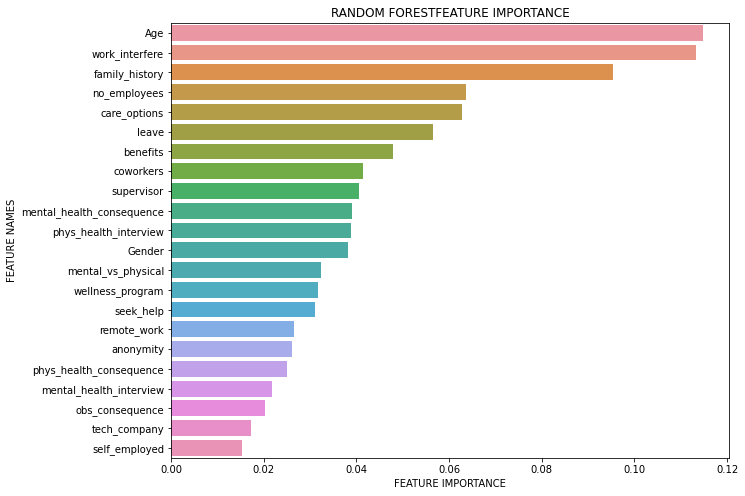

In [137]:
  plot_feature_importance(rfc.feature_importances_,X.columns,'RANDOM FOREST')

**from the plot above, the most important features the determines whether an employee has sougth for a mental health condition are:**
1. employee's **age**
2. Mental **history of Family**
3. and how employee's mental health **interfere with their work**